In [1]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib.ticker import NullFormatter  , ScalarFormatter
import matplotlib.axes as ax
import numpy as np
import statistics as st

In [2]:
MODE = 'W'
EXP = '21'

threads = 2
num_client_machines = 3
connections_per_thread = [1, 8, 16, 22, 28, 32, 40, 50]
clients = []

for c in connections_per_thread:
    clients.append(c*threads*num_client_machines)
clients

path_c1 = '/home/fla/Desktop/asl-fall18-project/Experiments/Exp_2/2.1/'+str(MODE)+'_only/Client1/'
path_c2 = '/home/fla/Desktop/asl-fall18-project/Experiments/Exp_2/2.1/'+str(MODE)+'_only/Client2/'
path_c3 = '/home/fla/Desktop/asl-fall18-project/Experiments/Exp_2/2.1/'+str(MODE)+'_only/Client3/'

WOthroughput_c1 = {1:[], 2:[], 3:[]}
WOthroughput_c2 = {1:[], 2:[], 3:[]}
WOthroughput_c3 = {1:[], 2:[], 3:[]}

WOlatencies_c1 = {1:[], 2:[], 3:[]}
WOlatencies_c2 = {1:[], 2:[], 3:[]}
WOlatencies_c3 = {1:[], 2:[], 3:[]}

WOideal_throughput_c1 = {1:[], 2:[], 3:[]}
WOideal_throughput_c2 = {1:[], 2:[], 3:[]}
WOideal_throughput_c3 = {1:[], 2:[], 3:[]}

WOideal_latencies_c1 = {1:[], 2:[], 3:[]}
WOideal_latencies_c2 = {1:[], 2:[], 3:[]}
WOideal_latencies_c3 = {1:[], 2:[], 3:[]}


## This puts in the map every measure for different number of connection_per_thread and every try.
for c in connections_per_thread:
    for n_try in [1, 2, 3]:
        filename_c1 = str(path_c1)+'E'+str(EXP)+str(MODE)+'OC1I1_C'+str(c)+'_try'+str(n_try)+'.log'
        filename_c2 = str(path_c2)+'E'+str(EXP)+str(MODE)+'OC2I1_C'+str(c)+'_try'+str(n_try)+'.log'
        filename_c3 = str(path_c3)+'E'+str(EXP)+str(MODE)+'OC3I1_C'+str(c)+'_try'+str(n_try)+'.log'
        
        file_c1 = open(filename_c1, "r")
        file_c2 = open(filename_c2, "r")
        file_c3 = open(filename_c3, "r")
        
        for line in file_c1:
            if(len(line.split())!=0):
                if(line.split()[0]=='Sets'):
                    #print(line)
                    WOthroughput_c1.get(n_try).append(float(line.split()[1]))
                    WOlatencies_c1.get(n_try).append(float(line.split()[4]))
                    WOideal_throughput_c1.get(n_try).append(float( (c*threads)/( float(line.split()[4])/1000)))
                    WOideal_latencies_c1.get(n_try).append(float( (c*threads)/( float(line.split()[1])/1000)))
                    
        for line in file_c2:
            if(len(line.split())!=0):
                if(line.split()[0]=='Sets'):
                    #print(line)
                    WOthroughput_c2.get(n_try).append(float(line.split()[1]))
                    WOlatencies_c2.get(n_try).append(float(line.split()[4]))
                    WOideal_throughput_c2.get(n_try).append(float( (c*threads)/( float(line.split()[4])/1000)))
                    WOideal_latencies_c2.get(n_try).append(float( (c*threads)/( float(line.split()[1])/1000)))
                    
                    
        for line in file_c3:
            if(len(line.split())!=0):
                if(line.split()[0]=='Sets'):
                    #print(line)
                    WOthroughput_c3.get(n_try).append(float(line.split()[1]))
                    WOlatencies_c3.get(n_try).append(float(line.split()[4]))
                    WOideal_throughput_c3.get(n_try).append(float( (c*threads)/( float(line.split()[4])/1000)))
                    WOideal_latencies_c3.get(n_try).append(float( (c*threads)/( float(line.split()[1])/1000)))
                    
                    
num_elem = len(WOthroughput_c3.get(1))


In [3]:
## Summing the throughputs

WOallClients_throughput = {1:[], 2:[], 3:[]}
WOallClients_IDEAL_throughput = {1:[], 2:[], 3:[]}

for i in range(0,num_elem,1):
    WOallClients_throughput.get(1).append(WOthroughput_c1.get(1)[i]+WOthroughput_c2.get(1)[i]+WOthroughput_c3.get(1)[i])
    WOallClients_throughput.get(2).append(WOthroughput_c1.get(2)[i]+WOthroughput_c2.get(2)[i]+WOthroughput_c3.get(2)[i])
    WOallClients_throughput.get(3).append(WOthroughput_c1.get(3)[i]+WOthroughput_c2.get(3)[i]+WOthroughput_c3.get(3)[i])

    WOallClients_IDEAL_throughput.get(1).append(WOideal_throughput_c1.get(1)[i]+WOideal_throughput_c2.get(1)[i]+WOideal_throughput_c3.get(1)[i])
    WOallClients_IDEAL_throughput.get(2).append(WOideal_throughput_c1.get(2)[i]+WOideal_throughput_c2.get(2)[i]+WOideal_throughput_c3.get(2)[i])
    WOallClients_IDEAL_throughput.get(3).append(WOideal_throughput_c1.get(3)[i]+WOideal_throughput_c2.get(3)[i]+WOideal_throughput_c3.get(3)[i])

    
#Calculating the weighted average over the different tries.
WOallClients_throughput_means = np.zeros(num_elem)
WOallClients_throughput_std = np.zeros(num_elem)
WOallClients_IDEAL_throughput_means = np.zeros(num_elem)
WOallClients_IDEAL_throughput_std = np.zeros(num_elem)

for i in range(0,num_elem,1):
    WOallClients_throughput_means[i] = np.mean(np.array([    WOallClients_throughput.get(1)[i],
                                                            WOallClients_throughput.get(2)[i],
                                                            WOallClients_throughput.get(3)[i]
                                                       ] ))
    WOallClients_throughput_std[i] = np.std(np.array([    WOallClients_throughput.get(1)[i],
                                                            WOallClients_throughput.get(2)[i],
                                                            WOallClients_throughput.get(3)[i]
                                                       ] ))
    
    WOallClients_IDEAL_throughput_means[i] = np.mean(np.array([    WOallClients_IDEAL_throughput.get(1)[i],
                                                            WOallClients_IDEAL_throughput.get(2)[i],
                                                            WOallClients_IDEAL_throughput.get(3)[i]
                                                       ] ))
    WOallClients_IDEAL_throughput_std[i] = np.std(np.array([    WOallClients_IDEAL_throughput.get(1)[i],
                                                            WOallClients_IDEAL_throughput.get(2)[i],
                                                            WOallClients_throughput.get(3)[i]
                                                       ] ))



# Weighted Latencies For Single Clients

In [4]:
WO_WEIGHTED_latencies = {1:[], 2:[], 3:[]}
WO_WEIGHTED_IDEAL_latencies = {1:[], 2:[], 3:[]}

WO_allClients_WEIGHTED_latencies_mean = np.zeros(num_elem)
WO_allClients_WEIGHTED_latencies_std = np.zeros(num_elem)

WO_allClients_WEIGHTED_IDEAL_latencies_mean = np.zeros(num_elem)
WO_allClients_WEIGHTED_IDEAL_latencies_std = np.zeros(num_elem)

#num_el = number of clients??

for i in range(0,num_elem,1):
    for n_try in [1, 2, 3]:
        w1 = (WOthroughput_c1.get(n_try)[i]/
            (WOthroughput_c1.get(n_try)[i]+WOthroughput_c2.get(n_try)[i]+WOthroughput_c3.get(n_try)[i]))
            
        w2 = (WOthroughput_c2.get(n_try)[i]/
            (WOthroughput_c1.get(n_try)[i]+WOthroughput_c2.get(n_try)[i]+WOthroughput_c3.get(n_try)[i]))
            
        w3 = (WOthroughput_c3.get(n_try)[i]/
            (WOthroughput_c1.get(n_try)[i]+WOthroughput_c2.get(n_try)[i]+WOthroughput_c3.get(n_try)[i]))
            
        # I have the aggregated clients latency
        WO_WEIGHTED_latencies.get(n_try).append( 
            ((WOlatencies_c1.get(n_try)[i]*w1) +                                   
            
            ((WOlatencies_c2.get(n_try)[i]*w2)) +                                   
            
            ((WOlatencies_c3.get(n_try)[i]*w3)                           
                                                )))
        
        
        w1 = (WOideal_throughput_c1.get(n_try)[i]/
            (WOideal_throughput_c1.get(n_try)[i]+WOideal_throughput_c2.get(n_try)[i]+WOideal_throughput_c3.get(n_try)[i]))
            
        w2 = (WOideal_throughput_c2.get(n_try)[i]/
            (WOideal_throughput_c1.get(n_try)[i]+WOideal_throughput_c2.get(n_try)[i]+WOideal_throughput_c3.get(n_try)[i]))
            
        w3 = (WOideal_throughput_c3.get(n_try)[i]/
            (WOideal_throughput_c1.get(n_try)[i]+WOideal_throughput_c2.get(n_try)[i]+WOideal_throughput_c3.get(n_try)[i]))

        
        
        WO_WEIGHTED_IDEAL_latencies.get(n_try).append( 
            ((WOideal_latencies_c1.get(n_try)[i]*w1) +                                   
            
            ((WOideal_latencies_c2.get(n_try)[i]*w2) +                                   
            
            ((WOideal_latencies_c3.get(n_try)[i]*w3)                           
                                                ))))
        
#We have to iterate on the different tries

for i in range(0,num_elem,1):
    
    w1 = (WOallClients_throughput.get(1)[i])/( WOallClients_throughput.get(1)[i] + WOallClients_throughput.get(2)[i] + WOallClients_throughput.get(3)[i])
    w2 = (WOallClients_throughput.get(2)[i])/( WOallClients_throughput.get(1)[i] + WOallClients_throughput.get(2)[i] + WOallClients_throughput.get(3)[i])
    w3 = (WOallClients_throughput.get(3)[i])/( WOallClients_throughput.get(1)[i] + WOallClients_throughput.get(2)[i] + WOallClients_throughput.get(3)[i])

    weights = [w1, w2, w3]
    WO_allClients_WEIGHTED_latencies_mean[i] = ( ((WO_WEIGHTED_latencies.get(1)[i])*w1)
                                           
                                           +((WO_WEIGHTED_latencies.get(2)[i])*w2)
                                           
                                           +((WO_WEIGHTED_latencies.get(3)[i])*w3)
                                          )
    tmp = [WO_WEIGHTED_latencies.get(1)[i], WO_WEIGHTED_latencies.get(2)[i], WO_WEIGHTED_latencies.get(3)[i] ]
    
    # qui io ci metterei normale std fra i dati di tmp
    
    WO_allClients_WEIGHTED_latencies_std[i] = np.average((tmp-WO_allClients_WEIGHTED_latencies_mean[i])**2, weights=weights)

        
        
        
    w1 = (WOallClients_IDEAL_throughput.get(1)[i])/( WOallClients_IDEAL_throughput.get(1)[i] + WOallClients_IDEAL_throughput.get(2)[i] + WOallClients_IDEAL_throughput.get(3)[i])
    w2 = (WOallClients_IDEAL_throughput.get(2)[i])/( WOallClients_IDEAL_throughput.get(1)[i] + WOallClients_IDEAL_throughput.get(2)[i] + WOallClients_IDEAL_throughput.get(3)[i])
    w3 = (WOallClients_IDEAL_throughput.get(3)[i])/( WOallClients_IDEAL_throughput.get(1)[i] + WOallClients_IDEAL_throughput.get(2)[i] + WOallClients_IDEAL_throughput.get(3)[i])

    weights = [w1, w2, w3]
    WO_allClients_WEIGHTED_IDEAL_latencies_mean[i] = ( ((WO_WEIGHTED_IDEAL_latencies.get(1)[i])*w1)
                                           
                                           +((WO_WEIGHTED_IDEAL_latencies.get(2)[i])*w2)
                                           
                                           +((WO_WEIGHTED_IDEAL_latencies.get(3)[i])*w3)
                                          )
    
    tmp = [WO_WEIGHTED_IDEAL_latencies.get(1)[i], WO_WEIGHTED_IDEAL_latencies.get(2)[i], WO_WEIGHTED_IDEAL_latencies.get(3)[i] ]
    WO_allClients_WEIGHTED_IDEAL_latencies_std[i] = np.average((tmp-WO_allClients_WEIGHTED_IDEAL_latencies_mean[i])**2, weights=weights)
    
    

In [24]:
WO_allClients_WEIGHTED_latencies_mean

array([ 0.88008565,  3.77926977,  6.44969409,  8.9889227 , 11.30645266,
       12.98963089, 16.38599222, 20.55251158])

In [25]:
clients

[6, 48, 96, 132, 168, 192, 240, 300]

In [26]:
for i in range(len(WO_allClients_WEIGHTED_latencies_mean)-1, -1, -1):
    clien = clients[i]-clients[i-1]
    m = (WO_allClients_WEIGHTED_latencies_mean[i]-WO_allClients_WEIGHTED_latencies_mean[i-1])/clien
    print(m)

0.06944198935539259
0.07075752753695348
0.0701324266065424
0.0643758321978129
0.07053412802772262
0.055633839862806234
0.06902819343792772
0.06691301335912


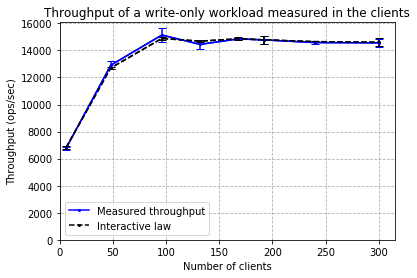

In [5]:
#USE clients
fig, ax_lst = plt.subplots(1, 1) 
plt.xlabel('Number of clients')
plt.ylabel('Throughput (ops/sec)')
plt.title("Throughput of a write-only workload measured in the clients")
plt.grid('true', axis='both', fillstyle='left', linestyle='dashed',clip_on='true')
line_c1, = plt.plot(clients, WOallClients_throughput_means, color='blue', linestyle='solid', marker='o',markerfacecolor='blue', markersize=2)
line_c2, = plt.plot(clients, WOallClients_IDEAL_throughput_means, color='black', linestyle='dashed', marker='o', markerfacecolor='black',markersize=2 )

ax_lst.errorbar(clients,WOallClients_throughput_means, yerr=WOallClients_throughput_std, color='blue', ecolor='blue', capthick=1, capsize=4)
ax_lst.errorbar(clients,WOallClients_IDEAL_throughput_means, yerr=WOallClients_IDEAL_throughput_std, color='black', linestyle='dashed', ecolor='black', capthick=1, capsize=4)
ax_lst.set_ylim(ymin=0)
ax_lst.set_xlim(xmin=0)

plt.legend([ line_c1, line_c2 ], ['Measured throughput','Interactive law'])

plt.savefig("../ThroughputE21WOallClients.png", bbox_inches='tight')

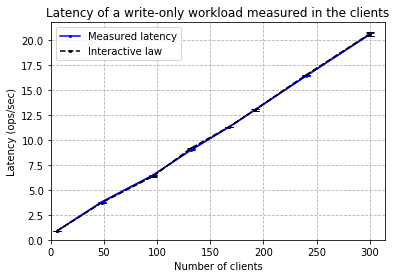

In [6]:
#USE clients
fig, ax_lst = plt.subplots(1, 1) 
plt.xlabel('Number of clients')
plt.ylabel('Latency (ops/sec)')
plt.title("Latency of a write-only workload measured in the clients")
plt.grid('true', axis='both', fillstyle='left', linestyle='dashed',clip_on='true')
line_c1, = plt.plot(clients, WO_allClients_WEIGHTED_latencies_mean, color='blue', linestyle='solid', marker='o',markerfacecolor='blue', markersize=2)
line_c2, = plt.plot(clients, WO_allClients_WEIGHTED_IDEAL_latencies_mean, color='black', linestyle='dashed', marker='o', markerfacecolor='black',markersize=2 )


ax_lst.errorbar(clients,WO_allClients_WEIGHTED_latencies_mean, yerr=WO_allClients_WEIGHTED_latencies_std, color='blue', ecolor='blue', capthick=1, capsize=4)
ax_lst.errorbar(clients,WO_allClients_WEIGHTED_IDEAL_latencies_mean, yerr=WO_allClients_WEIGHTED_IDEAL_latencies_std, linestyle='dashed', color='black', ecolor='black', capthick=1, capsize=4)
ax_lst.set_ylim(ymin=0)
ax_lst.set_xlim(xmin=0)

plt.legend([ line_c1, line_c2 ], ['Measured latency','Interactive law'])
plt.savefig("../LatencyE21WOallClients.png", bbox_inches='tight')

In [7]:
import csv
with open('../Write_Only_DataExp21.csv', 'wb') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(WOallClients_throughput_means)
    writer.writerow(WOallClients_throughput_std)
    
    writer.writerow(WOallClients_IDEAL_throughput_means)
    writer.writerow(WOallClients_IDEAL_throughput_std)

    writer.writerow(WO_allClients_WEIGHTED_latencies_mean)
    writer.writerow(WO_allClients_WEIGHTED_latencies_std)
    
    writer.writerow(WO_allClients_WEIGHTED_IDEAL_latencies_mean)
    writer.writerow(WO_allClients_WEIGHTED_IDEAL_latencies_std)


### For READ ONLY

In [8]:
MODE = 'R'
EXP = '21'

threads = 2
num_client_machines = 3
connections_per_thread = [1, 8, 16, 22, 28, 32, 40, 50]
clients = []

for c in connections_per_thread:
    clients.append(c*threads*num_client_machines)
clients

path_c1 = '/home/fla/Desktop/asl-fall18-project/Experiments/Exp_2/2.1/'+str(MODE)+'_only/Client1/'
path_c2 = '/home/fla/Desktop/asl-fall18-project/Experiments/Exp_2/2.1/'+str(MODE)+'_only/Client2/'
path_c3 = '/home/fla/Desktop/asl-fall18-project/Experiments/Exp_2/2.1/'+str(MODE)+'_only/Client3/'

ROthroughput_c1 = {1:[], 2:[], 3:[]}
ROthroughput_c2 = {1:[], 2:[], 3:[]}
ROthroughput_c3 = {1:[], 2:[], 3:[]}

ROlatencies_c1 = {1:[], 2:[], 3:[]}
ROlatencies_c2 = {1:[], 2:[], 3:[]}
ROlatencies_c3 = {1:[], 2:[], 3:[]}

ROideal_throughput_c1 = {1:[], 2:[], 3:[]}
ROideal_throughput_c2 = {1:[], 2:[], 3:[]}
ROideal_throughput_c3 = {1:[], 2:[], 3:[]}

ROideal_latencies_c1 = {1:[], 2:[], 3:[]}
ROideal_latencies_c2 = {1:[], 2:[], 3:[]}
ROideal_latencies_c3 = {1:[], 2:[], 3:[]}

## This puts in the map every measure for different number of connection_per_thread and every try.
for c in connections_per_thread:
    for n_try in [1, 2, 3]:
        filename_c1 = str(path_c1)+'E'+str(EXP)+str(MODE)+'OC1I1_C'+str(c)+'_try'+str(n_try)+'.log'
        filename_c2 = str(path_c2)+'E'+str(EXP)+str(MODE)+'OC2I1_C'+str(c)+'_try'+str(n_try)+'.log'
        filename_c3 = str(path_c3)+'E'+str(EXP)+str(MODE)+'OC3I1_C'+str(c)+'_try'+str(n_try)+'.log'
        
        file_c1 = open(filename_c1, "r")
        file_c2 = open(filename_c2, "r")
        file_c3 = open(filename_c3, "r")
        
        for line in file_c1:
            if(len(line.split())!=0):
                if(line.split()[0]=='Gets'):
                    #print(line)
                    ROthroughput_c1.get(n_try).append(float(line.split()[1]))
                    ROlatencies_c1.get(n_try).append(float(line.split()[4]))
                    ROideal_throughput_c1.get(n_try).append(float( (c*threads)/( float(line.split()[4])/1000)))
                    ROideal_latencies_c1.get(n_try).append(float( (c*threads)/( float(line.split()[1])/1000)))
                    
        for line in file_c2:
            if(len(line.split())!=0):
                if(line.split()[0]=='Gets'):
                    #print(line)
                    ROthroughput_c2.get(n_try).append(float(line.split()[1]))
                    ROlatencies_c2.get(n_try).append(float(line.split()[4]))
                    ROideal_throughput_c2.get(n_try).append(float( (c*threads)/( float(line.split()[4])/1000)))
                    ROideal_latencies_c2.get(n_try).append(float( (c*threads)/( float(line.split()[1])/1000)))

                    
        for line in file_c3:
            if(len(line.split())!=0):
                if(line.split()[0]=='Gets'):
                    #print(line)
                    ROthroughput_c3.get(n_try).append(float(line.split()[1]))
                    ROlatencies_c3.get(n_try).append(float(line.split()[4]))
                    ROideal_throughput_c3.get(n_try).append(float( (c*threads)/( float(line.split()[4])/1000)))
                    ROideal_latencies_c3.get(n_try).append(float( (c*threads)/( float(line.split()[1])/1000)))

                    
                    
num_elem = len(ROthroughput_c3.get(1))


In [9]:
## Summing the throughputs

ROallClients_throughput = {1:[], 2:[], 3:[]}
ROallClients_IDEAL_throughput = {1:[], 2:[], 3:[]}

for i in range(0,num_elem,1):
    ROallClients_throughput.get(1).append(ROthroughput_c1.get(1)[i]+ROthroughput_c2.get(1)[i]+ROthroughput_c3.get(1)[i])
    ROallClients_throughput.get(2).append(ROthroughput_c1.get(2)[i]+ROthroughput_c2.get(2)[i]+ROthroughput_c3.get(2)[i])
    ROallClients_throughput.get(3).append(ROthroughput_c1.get(3)[i]+ROthroughput_c2.get(3)[i]+ROthroughput_c3.get(3)[i])

    ROallClients_IDEAL_throughput.get(1).append(ROideal_throughput_c1.get(1)[i]+ROideal_throughput_c2.get(1)[i]+ROideal_throughput_c3.get(1)[i])
    ROallClients_IDEAL_throughput.get(2).append(ROideal_throughput_c1.get(2)[i]+ROideal_throughput_c2.get(2)[i]+ROideal_throughput_c3.get(2)[i])
    ROallClients_IDEAL_throughput.get(3).append(ROideal_throughput_c1.get(3)[i]+ROideal_throughput_c2.get(3)[i]+ROideal_throughput_c3.get(3)[i])

    
ROallClients_throughput_means = np.zeros(num_elem)
ROallClients_throughput_std = np.zeros(num_elem)
ROallClients_IDEAL_throughput_means = np.zeros(num_elem)
ROallClients_IDEAL_throughput_std = np.zeros(num_elem)

for i in range(0,num_elem,1):
    ROallClients_throughput_means[i] = np.mean(np.array([    ROallClients_throughput.get(1)[i],
                                                            ROallClients_throughput.get(2)[i],
                                                            ROallClients_throughput.get(3)[i]
                                                       ] ))
    ROallClients_throughput_std[i] = np.std(np.array([    ROallClients_throughput.get(1)[i],
                                                            ROallClients_throughput.get(2)[i],
                                                            ROallClients_throughput.get(3)[i]
                                                       ] ))
    
    ROallClients_IDEAL_throughput_means[i] = np.mean(np.array([    ROallClients_IDEAL_throughput.get(1)[i],
                                                            ROallClients_IDEAL_throughput.get(2)[i],
                                                            ROallClients_IDEAL_throughput.get(3)[i]
                                                       ] ))
    ROallClients_IDEAL_throughput_std[i] = np.std(np.array([    ROallClients_IDEAL_throughput.get(1)[i],
                                                            ROallClients_IDEAL_throughput.get(2)[i],
                                                            ROallClients_throughput.get(3)[i]
                                                       ] ))


In [10]:
RO_WEIGHTED_latencies = {1:[], 2:[], 3:[]}
RO_WEIGHTED_IDEAL_latencies = {1:[], 2:[], 3:[]}

RO_allClients_WEIGHTED_latencies_mean = np.zeros(num_elem)
RO_allClients_WEIGHTED_latencies_std = np.zeros(num_elem)

RO_allClients_WEIGHTED_IDEAL_latencies_mean = np.zeros(num_elem)
RO_allClients_WEIGHTED_IDEAL_latencies_std = np.zeros(num_elem)


for i in range(0,num_elem,1):
    for n_try in [1, 2, 3]:
        w1 =((ROthroughput_c1.get(n_try)[i])/
            (ROthroughput_c1.get(n_try)[i]+ROthroughput_c2.get(n_try)[i]+ROthroughput_c3.get(n_try)[i]))
            
        w2 = ((ROthroughput_c2.get(n_try)[i])/
            (ROthroughput_c1.get(n_try)[i]+ROthroughput_c2.get(n_try)[i]+ROthroughput_c3.get(n_try)[i]))
            
        w3 = (ROthroughput_c3.get(n_try)[i]/
            (ROthroughput_c1.get(n_try)[i]+ROthroughput_c2.get(n_try)[i]+ROthroughput_c3.get(n_try)[i]))
        
        RO_WEIGHTED_latencies.get(n_try).append( 
            (ROlatencies_c1.get(n_try)[i]*w1) +                                   
            
            (ROlatencies_c2.get(n_try)[i]*w2) +                                   
            
            (ROlatencies_c3.get(n_try)[i]*w3)                           
                                                )
        
        w1 =((ROideal_throughput_c1.get(n_try)[i])/
            (ROideal_throughput_c1.get(n_try)[i]+ROideal_throughput_c2.get(n_try)[i]+ROideal_throughput_c3.get(n_try)[i]))
            
        w2 = ((ROideal_throughput_c2.get(n_try)[i])/
            (ROideal_throughput_c1.get(n_try)[i]+ROideal_throughput_c2.get(n_try)[i]+ROideal_throughput_c3.get(n_try)[i]))
            
        w3 = (ROideal_throughput_c3.get(n_try)[i]/
            (ROideal_throughput_c1.get(n_try)[i]+ROideal_throughput_c2.get(n_try)[i]+ROideal_throughput_c3.get(n_try)[i]))
        
        
        
        RO_WEIGHTED_IDEAL_latencies.get(n_try).append( 
            (ROideal_latencies_c1.get(n_try)[i]*w1) +                                   
            
            (ROideal_latencies_c2.get(n_try)[i]*w2) +                                   
            
            (ROideal_latencies_c3.get(n_try)[i]*w3)                           
                                                )

for i in range(0,num_elem,1):
    #Empirical weigth
    w1 = (ROallClients_throughput.get(1)[i])/(ROallClients_throughput.get(1)[i]+ ROallClients_throughput.get(2)[i] + ROallClients_throughput.get(3)[i])
    w2 =(ROallClients_throughput.get(2)[i])/(ROallClients_throughput.get(2)[i] + ROallClients_throughput.get(1)[i] + ROallClients_throughput.get(3)[i])
    w3 = (ROallClients_throughput.get(3)[i])/(ROallClients_throughput.get(3)[i] + ROallClients_throughput.get(1)[i]+ ROallClients_throughput.get(2)[i])  
    
    weights = [w1, w2, w3]


    RO_allClients_WEIGHTED_latencies_mean[i] = ( ((RO_WEIGHTED_latencies.get(1)[i])*w1)
                                           
                                           +((RO_WEIGHTED_latencies.get(2)[i])*w2)
                                           
                                           +((RO_WEIGHTED_latencies.get(3)[i])*w3)
                                          )

    tmp = [RO_WEIGHTED_latencies.get(1)[i], RO_WEIGHTED_latencies.get(2)[i], RO_WEIGHTED_latencies.get(3)[i] ]
    RO_allClients_WEIGHTED_latencies_std[i] = np.average((tmp-RO_allClients_WEIGHTED_latencies_mean[i])**2, weights=weights)

    #ideal     
    w1 = (ROallClients_IDEAL_throughput.get(1)[i])/(ROallClients_IDEAL_throughput.get(1)[i]+ ROallClients_IDEAL_throughput.get(2)[i] +ROallClients_IDEAL_throughput.get(3)[i])
    w2 =(ROallClients_IDEAL_throughput.get(2)[i])/(ROallClients_IDEAL_throughput.get(2)[i] + ROallClients_IDEAL_throughput.get(1)[i] + ROallClients_IDEAL_throughput.get(3)[i])
    w3 = (ROallClients_throughput.get(3)[i])/(ROallClients_IDEAL_throughput.get(3)[i] + ROallClients_IDEAL_throughput.get(1)[i]+ ROallClients_IDEAL_throughput.get(2)[i])  
             
             
    RO_allClients_WEIGHTED_IDEAL_latencies_mean[i] = ( ((RO_WEIGHTED_IDEAL_latencies.get(1)[i])*w1)
                                           
                                           +((RO_WEIGHTED_IDEAL_latencies.get(2)[i])*w2)
                                           
                                           +((RO_WEIGHTED_IDEAL_latencies.get(3)[i])*w3)
                                          )
    tmp = [RO_WEIGHTED_IDEAL_latencies.get(1)[i], RO_WEIGHTED_IDEAL_latencies.get(2)[i], RO_WEIGHTED_IDEAL_latencies.get(3)[i] ]
    RO_allClients_WEIGHTED_IDEAL_latencies_std[i] = np.average((tmp-RO_allClients_WEIGHTED_IDEAL_latencies_mean[i])**2, weights=weights)  



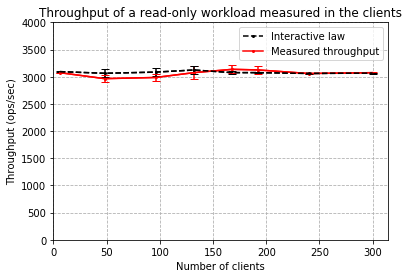

In [11]:
#USE clients
fig, ax_lst = plt.subplots(1, 1) 
plt.xlabel('Number of clients')
plt.ylabel('Throughput (ops/sec)')
plt.title("Throughput of a read-only workload measured in the clients")
plt.grid('true', axis='both', fillstyle='left', linestyle='dashed',clip_on='true')
line_c1, = plt.plot(clients, ROallClients_throughput_means, color='red', linestyle='solid', marker='o',markerfacecolor='red', markersize=2)
line_c2, = plt.plot(clients, ROallClients_IDEAL_throughput_means, color='black', linestyle='dashed', marker='o', markerfacecolor='black',markersize=2 )
ax_lst.set_ylim(ymin=0)
ax_lst.set_ylim(ymax=4000)

ax_lst.errorbar(clients, ROallClients_throughput_means, yerr=ROallClients_throughput_std, color='red', ecolor='red', capthick=1, capsize=4)
ax_lst.errorbar(clients, ROallClients_IDEAL_throughput_means, yerr=ROallClients_IDEAL_throughput_std, color='black', linestyle='dashed', ecolor='black', capthick=1, capsize=4)
ax_lst.set_xlim(xmin=0)

plt.legend([line_c2, line_c1], ['Interactive law', 'Measured throughput'])
plt.savefig("../ThroughputE21ROallClients.png", bbox_inches='tight')

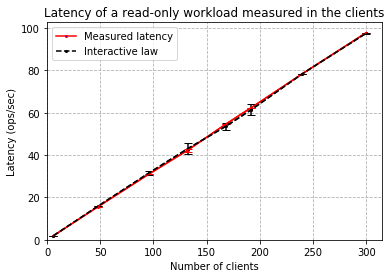

In [12]:
#USE clients
fig, ax_lst = plt.subplots(1, 1) 
plt.xlabel('Number of clients')
plt.ylabel('Latency (ops/sec)')
plt.title("Latency of a read-only workload measured in the clients")
plt.grid('true', axis='both', fillstyle='left', linestyle='dashed',clip_on='true')
line_c1, = plt.plot(clients, RO_allClients_WEIGHTED_latencies_mean, color='red', linestyle='solid', marker='o',markerfacecolor='blue', markersize=2)
line_c2, = plt.plot(clients, RO_allClients_WEIGHTED_IDEAL_latencies_mean, color='black', linestyle='dashed', marker='o', markerfacecolor='black',markersize=2 )


ax_lst.errorbar(clients,RO_allClients_WEIGHTED_latencies_mean, yerr=RO_allClients_WEIGHTED_latencies_std, color='red', linestyle='solid', ecolor='red', capthick=1, capsize=4)
ax_lst.errorbar(clients,RO_allClients_WEIGHTED_IDEAL_latencies_mean, yerr=RO_allClients_WEIGHTED_IDEAL_latencies_std, color='black', linestyle='dashed', ecolor='black', capthick=1, capsize=4)
ax_lst.set_ylim(ymin=0)
ax_lst.set_xlim(xmin=0)

plt.legend([ line_c1, line_c2 ], ['Measured latency','Interactive law'])
plt.savefig("../LatencyE21ROallClients.png", bbox_inches='tight')

In [13]:
import csv
with open('../Read_Only_DataExp21.csv', 'wb') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(ROallClients_throughput_means)
    writer.writerow(ROallClients_throughput_std)
    
    writer.writerow(ROallClients_IDEAL_throughput_means)
    writer.writerow(ROallClients_IDEAL_throughput_std)

    writer.writerow(RO_allClients_WEIGHTED_latencies_mean)
    writer.writerow(RO_allClients_WEIGHTED_latencies_std)
    
    writer.writerow(RO_allClients_WEIGHTED_IDEAL_latencies_mean)
    writer.writerow(RO_allClients_WEIGHTED_IDEAL_latencies_std)


## Comparing Write_Only & Read_Only throughput !!!

/home/fla/miniconda2/lib/python2.7/site-packages/matplotlib/axes/_axes.py:2876: MatplotlibDeprecationWarning: Use of None object as fmt keyword argument to suppress plotting of data values is deprecated since 1.4; use the string "none" instead.
  warnings.warn(msg, mplDeprecation, stacklevel=1)


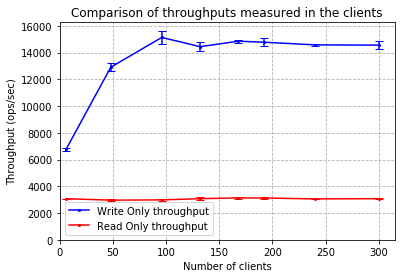

In [14]:
#USE clients
fig, ax_lst = plt.subplots(1, 1) 
plt.xlabel('Number of clients')
plt.ylabel('Throughput (ops/sec)')
plt.title("Comparison of throughputs measured in the clients")
plt.grid('true', axis='both', fillstyle='left', linestyle='dashed',clip_on='true')
line_c1, = plt.plot(clients, WOallClients_throughput_means, color='blue', linestyle='solid', marker='o',markerfacecolor='blue', markersize=2)
line_c2, = plt.plot(clients, ROallClients_throughput_means, color='red', linestyle='solid', marker='o', markerfacecolor='red',markersize=2 )

ax_lst.errorbar(clients,WOallClients_throughput_means, yerr=WOallClients_throughput_std, fmt=None, ecolor='b', capthick=1, capsize=4)
ax_lst.errorbar(clients,ROallClients_throughput_means, yerr=ROallClients_throughput_std, fmt=None, ecolor='red', capthick=1, capsize=4)
ax_lst.set_ylim(ymin=0)
ax_lst.set_xlim(xmin=0)

plt.legend([ line_c1, line_c2 ], ['Write Only throughput','Read Only throughput'])
plt.savefig("../WriteVSReadE21THROUGHPUT.png", bbox_inches='tight')

In [15]:
WOallClients_throughput_means

array([ 6767.26      , 12907.11      , 15133.52666667, 14443.96      ,
       14851.85333333, 14775.71333333, 14577.92333333, 14558.67      ])

In [16]:
np.max(WOallClients_throughput_means)

15133.526666666667

In [17]:
ROallClients_throughput_means

array([3074.58333333, 2964.53666667, 2986.06666667, 3074.92666667,
       3135.95666667, 3125.21333333, 3059.13333333, 3074.82333333])

In [18]:
np.max(ROallClients_throughput_means)

3135.956666666667

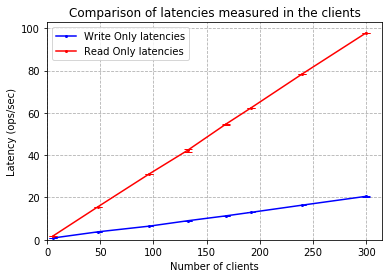

In [19]:
#USE clients
fig, ax_lst = plt.subplots(1, 1) 
plt.xlabel('Number of clients')
plt.ylabel('Latency (ops/sec)')
plt.title("Comparison of latencies measured in the clients")
plt.grid('true', axis='both', fillstyle='left', linestyle='dashed',clip_on='true')
line_c1, = plt.plot(clients, WO_allClients_WEIGHTED_latencies_mean, color='blue', linestyle='solid', marker='o',markerfacecolor='blue', markersize=2)
line_c2, = plt.plot(clients, RO_allClients_WEIGHTED_latencies_mean, color='red', linestyle='solid', marker='o', markerfacecolor='red',markersize=2 )

ax_lst.errorbar(clients,WO_allClients_WEIGHTED_latencies_mean, yerr=WO_allClients_WEIGHTED_latencies_std, fmt=None, ecolor='blue', capthick=1, capsize=4)
ax_lst.errorbar(clients,RO_allClients_WEIGHTED_latencies_mean, yerr=RO_allClients_WEIGHTED_latencies_std, fmt=None, ecolor='red', capthick=1, capsize=4)
ax_lst.set_ylim(ymin=0)
ax_lst.set_xlim(xmin=0)

plt.legend([ line_c1, line_c2 ], ['Write Only latencies','Read Only latencies'])
plt.savefig("../WriteVSReadE21LATENCY.png", bbox_inches='tight')